<a href="https://colab.research.google.com/github/YuehMintTai/RPython/blob/main/Class08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#三軍總醫院北投分院統計及實驗設計課程之八
## 2021/7/13
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

In [1]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 125 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (125/125), 2.72 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
##0-2
!pip install rpy2

In [3]:
##0-3
%load_ext rpy2.ipython

In [4]:
##8-1
import tensorflow as tf
import torch
tf.__version__     ##2.5.0
torch.__version__   ##1.9.0+cu102

'1.9.0+cu102'

In [ ]:
##8-2 區分 training, validation, testing sets..
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import numpy as np


df=pd.read_csv('RPython/samples.csv')
df['sex']='男'
df.loc[df['性別']==2,'sex']='女'
x=df[['sex','網路成癮分數YDQ','家庭滿意度apgar']]
x=pd.get_dummies(data=x,drop_first=True)
y=df['自殺意念01'].astype(int).to_frame()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_test

In [25]:
##8-3 使用tensorflow+validation作模型預測...
import tensorflow as tf
from sklearn.metrics import roc_auc_score
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1,input_dim=3,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
model1.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.25)
scores=model1.evaluate(x_test,y_test)
predicted_prob=model1.predict(x_test)
predicted_prob

Epoch 1/10
12/12 [==============================] - 2s 49ms/step - loss: 0.5821 - accuracy: 0.8214 - auc_5: 0.4799 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.4989 - val_accuracy: 0.8421 - val_auc_5: 0.5104 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.8214 - auc_5: 0.4840 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.4946 - val_accuracy: 0.8421 - val_auc_5: 0.5182 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.8214 - auc_5: 0.4810 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.4909 - val_accuracy: 0.8421 - val_auc_5: 0.5078 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.8214 - auc_5: 0.4818 - precision_3: 0.0000e+00 - recall_3: 0

array([[0.04882681],
       [0.15685692],
       [0.17285508],
       [0.05038446],
       [0.02679411],
       [0.3133219 ],
       [0.02679411],
       [0.09783036],
       [0.20326424],
       [0.02766931],
       [0.29321608],
       [0.12483734],
       [0.08157951],
       [0.06083286],
       [0.2474297 ],
       [0.12483734],
       [0.12483734],
       [0.09783036],
       [0.12483734],
       [0.04843014],
       [0.03755802],
       [0.3133219 ],
       [0.02679411],
       [0.12483734],
       [0.07615757],
       [0.07615757],
       [0.147234  ],
       [0.1624398 ],
       [0.12036112],
       [0.12483734],
       [0.27626812],
       [0.20326424],
       [0.1624398 ],
       [0.12483734],
       [0.05897221],
       [0.02766931],
       [0.05897221],
       [0.147234  ]], dtype=float32)

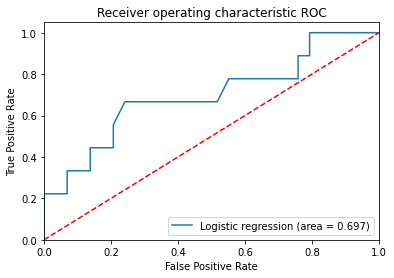

In [57]:
result=np.concatenate((y_test.to_numpy(), predicted_prob),axis=1)
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
AUC面積=roc_auc_score(y_test, predicted_prob) ##0.6973180076628352

fpr,tpr,thresholds=roc_curve(y_test,predicted_prob)
plt.figure()
plt.plot(fpr,tpr,label='Logistic regression (area = %0.3f)'%AUC面積)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")
plt.show()

In [35]:
y_test.to_numpy().shape
predicted_prob.shape

(38, 1)